In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Titanic-Dataset.csv",index_col=False)

In [3]:
df = df.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)

In [4]:
df["Sex"] = df["Sex"].map({"male":1,"female":0})
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].map({"S":1,"C":2,"Q":3})
df["Embarked"] = df["Embarked"].fillna(1)

In [5]:
max_age = df["Age"].max()
min_age = df["Age"].min()
df["Age"] = (df["Age"] - min_age)/max_age

In [6]:
max_fare = df["Fare"].max()
min_fare = df["Fare"].min()
df["Fare"] = (df["Fare"] - min_fare)/max_fare

In [7]:
label = df["Survived"]
df = df.drop("Survived", axis="columns")

In [8]:
train_data = df.iloc[0:661]
train_label = label.iloc[0:661]
val_data = df.iloc[661:795]
val_label = label.iloc[661:795]
test_data = df.iloc[795:892]
test_label = label.iloc[795:892]

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=32, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")
])

2024-07-03 01:34:32.686667: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-03 01:34:32.689952: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-03 01:34:32.700744: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-03 01:34:32.722025: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-03 01:34:32.722071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-03 01:34:32.736235: I tensorflow/core/platform/cpu_feature_guard.cc:

In [10]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

2024-07-03 01:34:33.966749: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-03 01:34:33.967245: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
history = model.fit(train_data, train_label, epochs=20, batch_size=32, validation_data=(val_data,val_label))

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6037 - loss: 0.6366 - val_accuracy: 0.7537 - val_loss: 0.5272
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7617 - loss: 0.5381 - val_accuracy: 0.8134 - val_loss: 0.5049
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.5153 - val_accuracy: 0.7985 - val_loss: 0.4735
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8026 - loss: 0.4834 - val_accuracy: 0.8284 - val_loss: 0.4624
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8127 - loss: 0.4657 - val_accuracy: 0.7910 - val_loss: 0.4508
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7570 - loss: 0.5097 - val_accuracy: 0.8284 - val_loss: 0.4447
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7755 - loss: 0.5012 - val_accuracy: 0.8134 - val_loss: 0.4426
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8141 - loss: 0.4376 - val_accuracy: 0.8209 - val_loss:

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
epochs = np.arange(1,21)

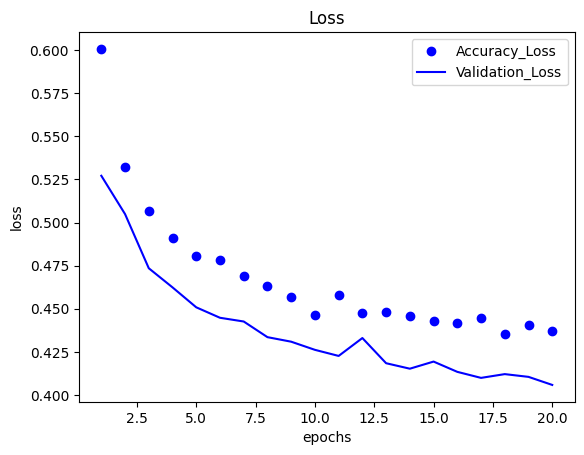

In [15]:
plt.plot(epochs, history_dict.get("loss"), "bo", label="Accuracy_Loss")
plt.plot(epochs, history_dict.get("val_loss"), "b", label="Validation_Loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

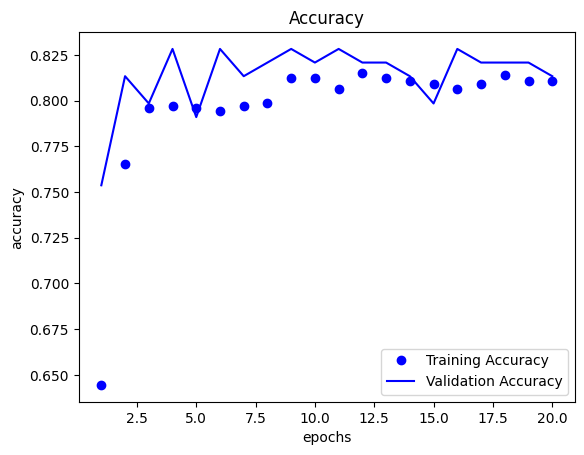

In [16]:
plt.plot(epochs, history_dict.get("accuracy"), "bo", label="Training Accuracy")
plt.plot(epochs, history_dict.get("val_accuracy"), "b", label="Validation Accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [17]:
result = model.evaluate(test_data, test_label)
result

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8307 - loss: 0.4293 


[0.4154963493347168, 0.8333333134651184]

In [18]:
model.predict(test_data.iloc[1].values.reshape(1, -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.9385868]], dtype=float32)

In [19]:
test_label.iloc[1]

1